# Analisis Pitch Instrumen Musik

Proyek ini bertujuan untuk mengidentifikasi pitch (frekuensi fundamental) dari suatu instrumen musik menggunakan teknik pengolahan sinyal digital seperti Fast Fourier Transform (FFT) dan algoritma pyin, sistem ini akan menganalisis sinyal audio untuk mendeteksi nada yang dimainkan. Hasil dari proyek ini diharapkan dapat digunakan untuk aplikasi seperti tuning instrumen, analisis musik, atau pengembangan perangkat musik digital yang lebih presisi.


Sumber Data:
https://freesound.org/search/?q=single+note+guitar+&f=grouping_pack%3A%2229636_CS+80+GUITAR+1%22


**Anggota Kelompok:**
1.   Nazula Sinta Wati (23031554105)
2.   Sofia Zahira Rohman (23031554197)
3.   Krisjen Fraulein Hutagalung (23031554232)

## Akuisisi Data

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

In [ ]:
audio_file_path = r'/content/Sinyal Gitar A6.wav'
y, sr = librosa.load(audio_file_path)
y, sr

ipd.Audio(y, rate=sr)

Berikan penjelasan tentang sinyal tersebut.

*   Sinyal apakah itu?

    Sinyal ini adalah sinyal audio gitar akustik.

*   Bagaimana sinyal itu diperoleh? Sinyal tersebut menggambarkan kondisi apa?

    Sinyal ini diperoleh melalui proses perekaman suara, di mana getaran suara dari instrumen direkam oleh mikrofon. Sinyal ini menunjukkan getaran atau gelombang suara yang dihasilkan saat nada-nada tertentu dimainkan dengan kecepatan maksimum .

*   Informasi apa sajakah yang tersimpan pada sinyal tersebut?

    Informasi yang tersimpan pada sinyal :
    Frekuensi: Menggambarkan nada dari suara gitar.
    Amplitudo: Mengindikasikan kekuatan atau intensitas suara.
    Durasi: Menunjukkan panjang permainan.
    Harmonik: Memberi informasi tentang karakter suara (timbre)

*   Apa perbedaan sinyal dalam kondisi normal dan abnormal?

    Perbedaan sinyal saat normal dan abnormal:
    Normal : Sinyal memiliki pola gelombang yang halus dan konsisten, tanpa distorsi. Frekuensi fundamental dan harmoniknya jelas.
    Abnormal: Sinyal menunjukkan distorsi, noise, atau gangguan seperti amplitudo yang terlalu berfluktuasi, suara pecah, atau nada yang tidak stabil.

## Visualisasi Sinyal

##Domain Waktu

The audio file is mono.


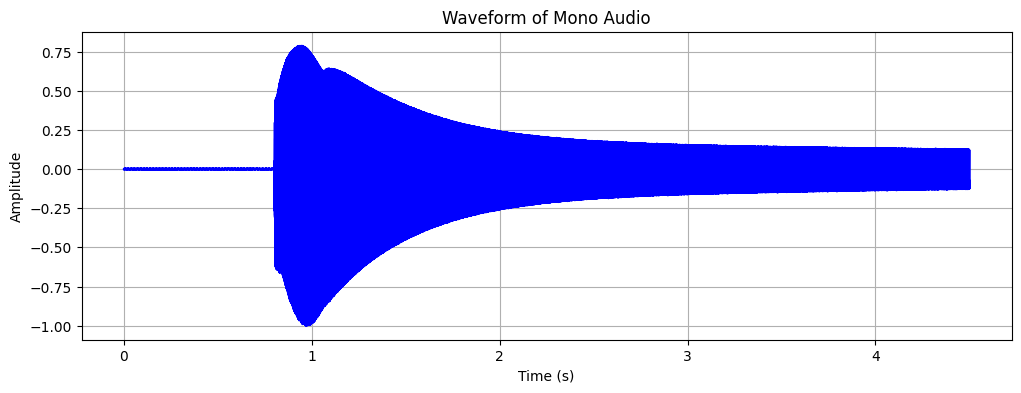

In [ ]:
file_path = audio_file_path  # Replace with your audio file path
y, sr = librosa.load(file_path, sr=None, mono=True)  # Force mono

# Check if the file is mono
if len(y.shape) == 1:  # Mono will have a 1D array
    print("The audio file is mono.")

    # Create time axis
    time_axis = np.arange(len(y)) / sr

    # Plot waveform
    plt.figure(figsize=(12, 4))
    plt.plot(time_axis, y, color='blue')
    plt.title("Waveform of Mono Audio")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()
else:
    print("The audio file is not mono. Convert it to mono before plotting.")


Dari grafik sinyal dalam domain waktu yang ditampilkan, beberapa informasi penting yang dapat diperoleh, yaitu grafik ini merepresentasikan perubahan amplitudo sinyal audio sepanjang waktu, dengan sumbu x menunjukkan waktu dalam detik dan sumbu y menunjukkan amplitudo sinyal.

##Domain Frekuensi

In [ ]:
import librosa
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

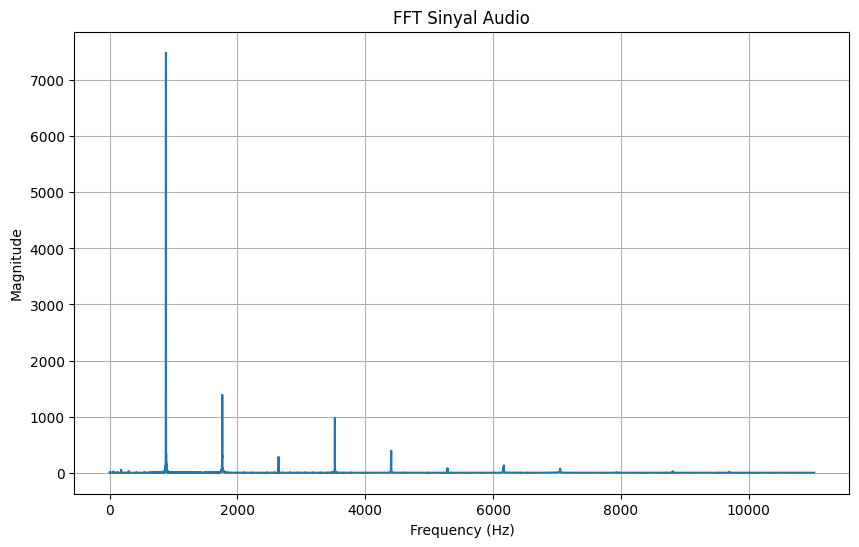

In [ ]:
y, sr = librosa.load(audio_file_path)

fft_result = np.fft.fft(y)
fft_freq = np.fft.fftfreq(len(fft_result), 1/sr)

fft_magnitude = np.abs(fft_result)

plt.figure(figsize=(10, 6))
plt.plot(fft_freq[:len(fft_freq)//2], fft_magnitude[:len(fft_magnitude)//2])
plt.title('FFT Sinyal Audio')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

Dari hasil transformasi sinyal ke domain frekuensi menggunakan FFT (Fast Fourier Transform), kami mendapatkan beberapa informasi penting yang diperoleh, yaitu puncak tertinggi pada grafik menunjukkan frekuensi dominan, yang dapat digunakan untuk menentukan nada dasar (pitch/fundamental frequency) yang dimainkan. Selain itu, terlihat beberapa puncak lebih kecil setelah puncak utama yang menunjukkan adanya overtone atau harmonik, yaitu frekuensi yang merupakan kelipatan dari frekuensi dasar dan berkontribusi pada warna suara (timbre). Sumbu y pada grafik mewakili magnitudo, yang menunjukkan kekuatan atau intensitas dari setiap frekuensi. Frekuensi dengan magnitudo lebih tinggi mendominasi suara yang dihasilkan, sedangkan komponen dengan magnitudo kecil dapat dianggap sebagai noise.

## MEL SPECTOGRAM

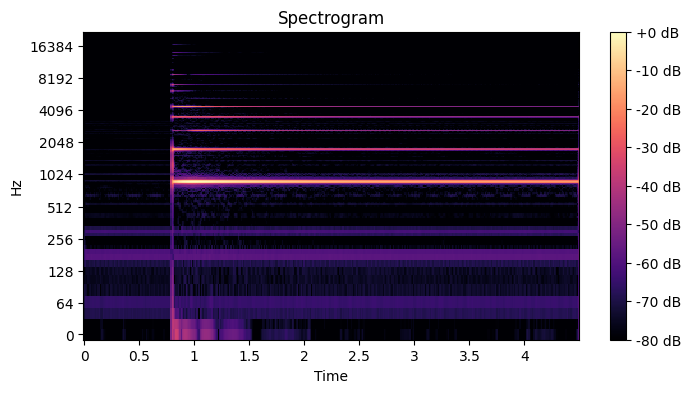

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load(audio_file_path, sr=None)

# Plot the spectrogram
plt.figure(figsize=(8, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

Dari spektrogram yang ditampilkan, beberapa informasi penting dapat diperoleh mengenai sinyal audio. Spektrogram merepresentasikan distribusi energi sinyal dalam domain waktu dan frekuensi, dengan sumbu horizontal (x) menunjukkan waktu (detik), sumbu vertikal (y) menunjukkan frekuensi (dalam Hz), dan intensitas warna merepresentasikan amplitudo atau kekuatan sinyal dalam desibel (dB).

## Pra-Pemrosesan

Langkah-langkah yang dilakukan dalam pra-pemrosesan sinyal suara instrumen:
1. Cutting
   Kami memotong bagian sinyal yang tidak memiliki informasi frekuensi yang signifikan (pada kasus ini, bagian awal audio). Langkah ini bertujuan untuk menghilangkan bagian yang tidak relevan dan fokus pada bagian sinyal yang mengandung informasi penting.  
2. Filtering
   *   High Pass Filter (HPF): Kami menerapkan high pass filter untuk meredam komponen sinyal dengan frekuensi rendah. Filter ini membantu menghilangkan noise frekuensi rendah seperti hum atau getaran.
   *   Low Pass Filter (LPF): Kami menggunakan low pass filter untuk meredam komponen sinyal dengan frekuensi tinggi. Ini bertujuan mengurangi noise berfrekuensi tinggi yang tidak relevan dengan suara instrumen.

Kedua proses ini bertujuan untuk mengurangi gangguan noise dan memastikan sinyal yang diolah lebih bersih. Dengan demikian, proses ekstraksi fitur dapat dilakukan dengan lebih akurat, sehingga fitur yang dihasilkan tidak bias terhadap noise yang ada pada sinyal.



##Cutting

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
from pydub.silence import detect_nonsilent

In [ ]:
# Load the audio file
file_path = audio_file_path
audio = AudioSegment.from_file(file_path)

# Detect non-silent parts
nonsilent_ranges = detect_nonsilent(audio, min_silence_len=500, silence_thresh=-40)

# Extract the first non-silent range (if any)
if nonsilent_ranges:
    start_trim = nonsilent_ranges[0][0]
    trimmed_audio = audio[start_trim:]
else:
    # If no non-silent parts are detected, return the original audio
    trimmed_audio = audio

# Save the trimmed audio
output_trimmed_path = 'Sinyal_Gitar_trimmed.wav'
trimmed_audio.export(output_trimmed_path, format="wav")

print(f"Trimmed audio saved to {output_trimmed_path}")

Trimmed audio saved to Sinyal_Gitar_trimmed.wav


In [ ]:
audio_file = output_trimmed_path
y, sr = librosa.load(audio_file)
y, sr

ipd.Audio(y, rate=sr)

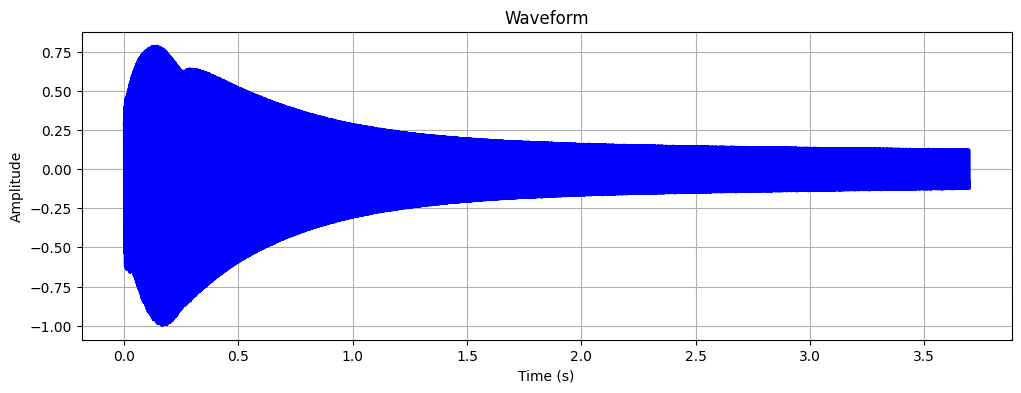

In [ ]:
file_path = audio_file
y, sr = librosa.load(file_path, sr=None, mono=True)

if len(y.shape) == 1:
    time_axis = np.arange(len(y)) / sr
    plt.figure(figsize=(12, 4))
    plt.plot(time_axis, y, color='blue')
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()
else:
    print("The audio file is not mono. Convert it to mono before plotting.")


##Filtering

In [ ]:
import wave
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

**HIGH PASS FILTER**

In [ ]:
# Load the audio file
file_path = output_trimmed_path
audio_file1 = wave.open(file_path, 'rb')

# Extract audio parameters
n_channels = audio_file1.getnchannels()
frame_rate = audio_file1.getframerate()
n_frames = audio_file1.getnframes()

# Read audio data and convert to NumPy array
audio_frames1 = audio_file1.readframes(n_frames)
audio_data1 = np.frombuffer(audio_frames1, dtype=np.int16)
audio_file1.close()

# Design a High-Pass Filter (HPF)
cutoff_freq = 10  # Cutoff frequency in Hz
nyquist_rate = frame_rate / 2  # Nyquist frequency
normal_cutoff = cutoff_freq / nyquist_rate

# Design Butterworth high-pass filter
b, a = signal.butter(4, normal_cutoff, btype='high', analog=False)

# Apply the filter to the audio data
hpf_audio_data = signal.filtfilt(b, a, audio_data1)

In [ ]:
output_hpf_path = r"/content/Sinyal_highpassfilter.wav"
output_file = wave.open(output_hpf_path, 'wb')
output_file.setnchannels(n_channels)
output_file.setsampwidth(2)  # 16-bit audio = 2 bytes per sample
output_file.setframerate(frame_rate)
output_file.writeframes(hpf_audio_data.astype(np.int16).tobytes())
output_file.close()

print(f'Filtered audio saved at: {output_hpf_path}')

Filtered audio saved at: /content/Sinyal_highpassfilter.wav


In [ ]:
audio_file = output_hpf_path
y, sr = librosa.load(audio_file)
y, sr

ipd.Audio(y, rate=sr)

**LOW PASS FILTER**

In [ ]:
# Load the audio file
file_path = output_hpf_path
audio_file2 = wave.open(file_path, 'rb')

# Extract audio parameters
n_channels = audio_file2.getnchannels()
frame_rate = audio_file2.getframerate()
n_frames = audio_file2.getnframes()

# Read audio data and convert to NumPy array
audio_frames2 = audio_file2.readframes(n_frames)
audio_data2 = np.frombuffer(audio_frames2, dtype=np.int16)
audio_file2.close()

# Design a Low-Pass Filter (LPF)
cutoff_freq = 1000  # Cutoff frequency in Hz
nyquist_rate = frame_rate / 2  # Nyquist frequency
normal_cutoff = cutoff_freq / nyquist_rate

# Design Butterworth low-pass filter
b, a = signal.butter(4, normal_cutoff, btype='low', analog=False)

# Apply the filter to the audio data
lpf_audio_data = signal.filtfilt(b, a, audio_data2)

In [ ]:
# Save the filtered audio to a new WAV file
output_lpf_path = r"/content/Sinyal_lowpass_filter.wav"
output_file = wave.open(output_lpf_path, 'wb')
output_file.setnchannels(n_channels)
output_file.setsampwidth(2)  # 16-bit audio = 2 bytes per sample
output_file.setframerate(frame_rate)
output_file.writeframes(lpf_audio_data.astype(np.int16).tobytes())
output_file.close()

print(f'Filtered audio saved at: {output_lpf_path}')

Filtered audio saved at: /content/Sinyal_lowpass_filter.wav


In [ ]:
# audio_file1 = output_lpf_path
y, sr = librosa.load(output_lpf_path)
y, sr

ipd.Audio(y, rate=sr)

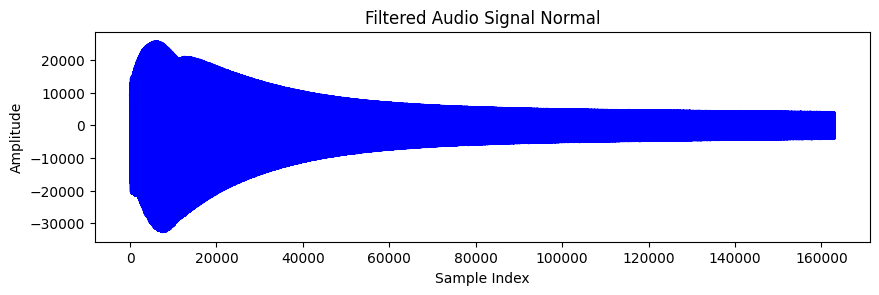

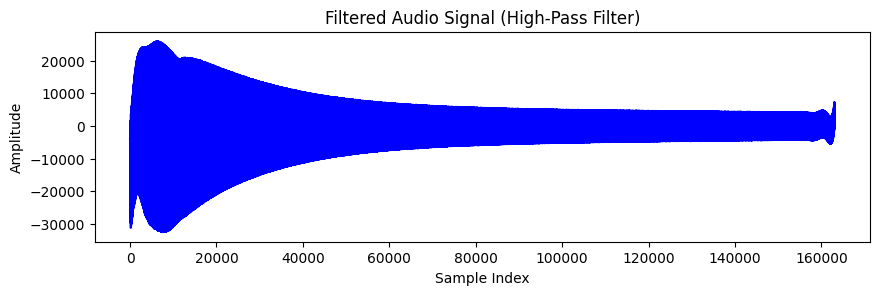

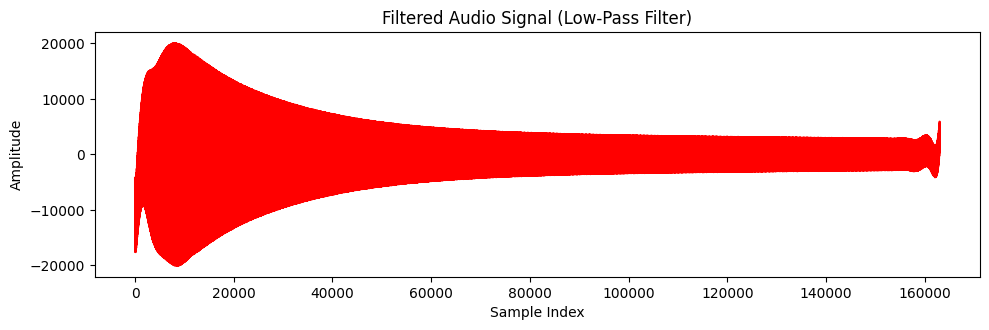

In [ ]:
# Plot original vs filtered waveform
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_data1, color='blue')
plt.title('Filtered Audio Signal Normal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_data2, color='blue')
plt.title('Filtered Audio Signal (High-Pass Filter)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.plot(lpf_audio_data, color='red')
plt.title('Filtered Audio Signal (Low-Pass Filter)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

**FREQUENCY DOMAIN**

ORIGINAL AUDIO


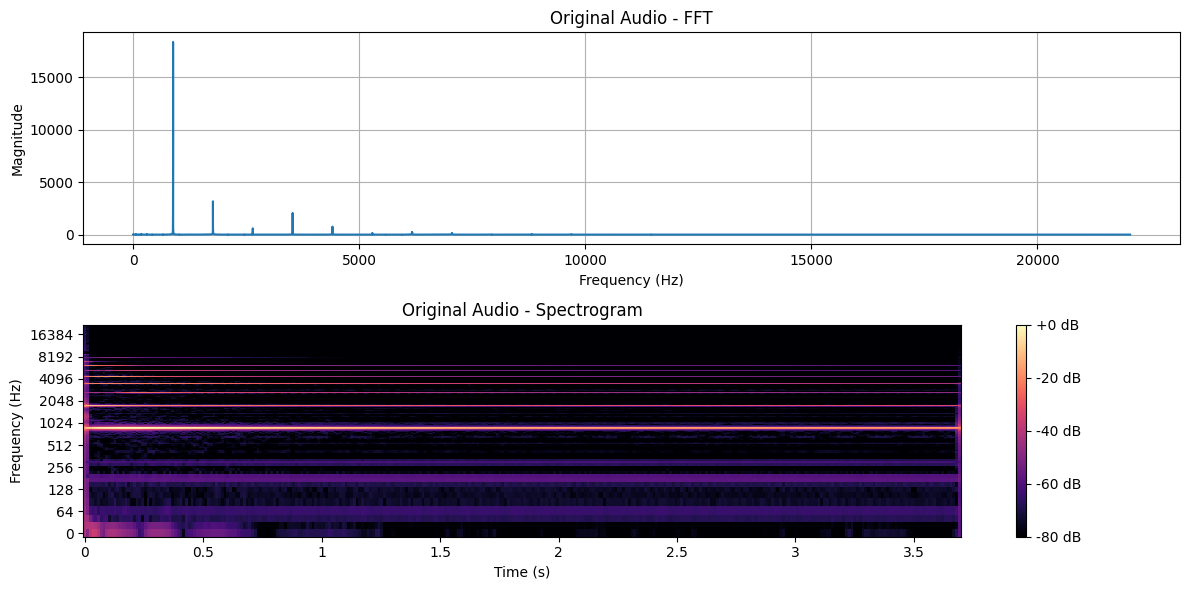

HIGH PASS FILTER AUDIO


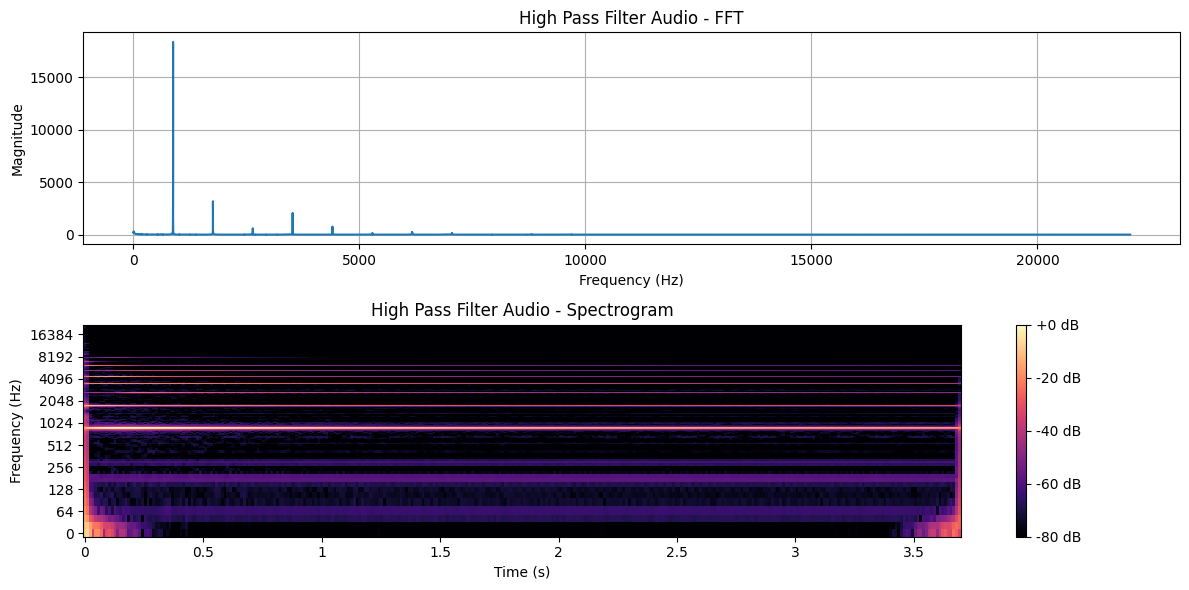

LOW PASS FILTER AUDIO


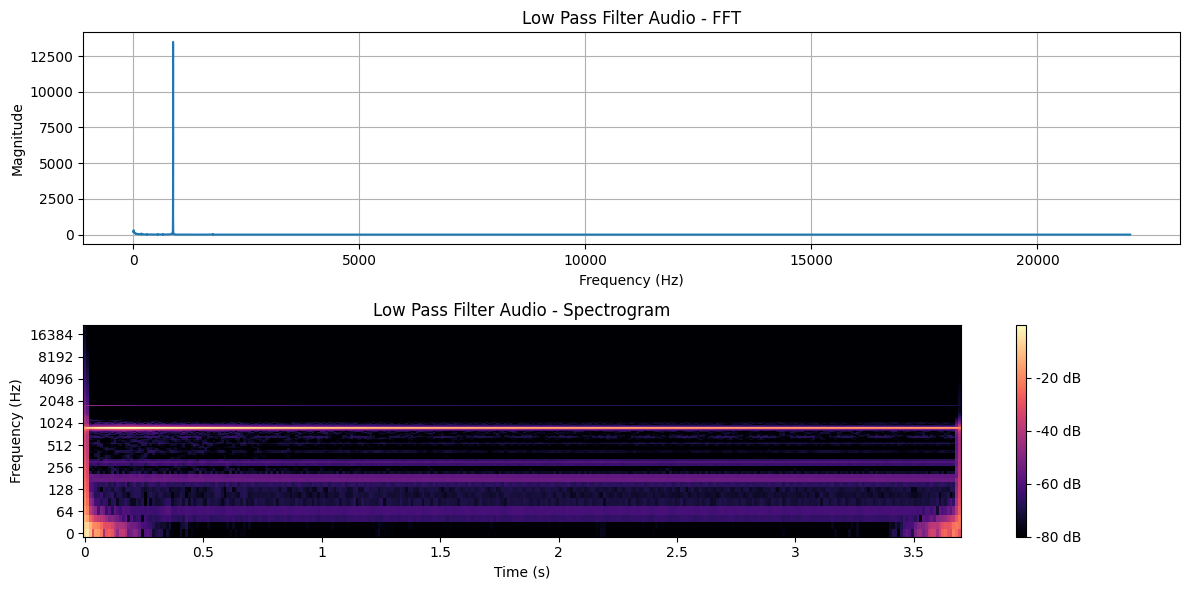

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot both FFT and spectrogram for an audio file
def analyze_audio(audio_path, title):
    print(title.upper())

    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None)

    # FFT analysis
    fft_result = np.fft.fft(y)
    fft_freq = np.fft.fftfreq(len(fft_result), 1/sr)
    fft_magnitude = np.abs(fft_result)

    # Plot FFT
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(fft_freq[:len(fft_freq)//2], fft_magnitude[:len(fft_magnitude)//2])
    plt.title(f'{title} - FFT')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)

    # Spectrogram
    plt.subplot(2, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{title} - Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

# Paths to audio files
audio_files = {
    "Original Audio": output_trimmed_path,
    "High Pass Filter Audio": output_hpf_path,
    "Low Pass Filter Audio": output_lpf_path
}

# Analyze each audio file
for title, path in audio_files.items():
    analyze_audio(path, title)

## Ekstraksi Fitur

Fitur yang ingin kami ekstrak adalah frekuensi dasar (F0) dari sinyal tersebut. Fundamental frequency (F0) adalah fitur utama yang sering digunakan dalam Automatic Music Transcription (AMT). Ekstraksi F0 relevan untuk memahami karakteristik suara seperti nada dan harmoni. Sebagai contoh, penelitian oleh Benetos et al. (2018) menunjukkan bahwa F0 digunakan dalam teknik berbasis Non-negative Matrix Factorization (NMF) dan Probabilistic Latent Component Analysis (PLCA) untuk mendeteksi dan memodelkan pitch pada sinyal audio secara akurat.

Pada kasus ini kami menggunakan algoritma PYIN dari library librosa untuk mengekstrak F0 dari sinyal. Algoritma PYIN adalah modifikasi algoritma YIN untuk estimasi frekuensi fundamental (F0) yang lebih baik (Mauch & Dixon, 2014).
Menurut Mauch & Dixon, 2014, pYIN adalah metode yang terdiri dari dua tahap utama:
1. Ekstraksi Frame-wise: Mengambil beberapa kandidat pitch dari setiap frame, lengkap dengan probabilitasnya.
2. Pelacakan Berbasis HMM: Menggunakan Hidden Markov Model (HMM) untuk mengubah kandidat pitch menjadi jalur pitch monofonik yang halus.

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy import stats
import pandas as pd

**EXTRACT AVERAGE F0 USING PYIN ALGORITHM**

In [ ]:
def extract_average_f0(file_path, fmin_="E2", fmax_="C8"):
    if pd.isna(file_path):
        return np.nan  # Return NaN if file_path is empty or invalid
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)  # Keep original sample rate

        # Define fmin and fmax based on input parameters
        fmin = librosa.note_to_hz(fmin_)
        fmax = librosa.note_to_hz(fmax_)

        # Extract pitch (F0) using librosa's pyin function
        f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=fmin, fmax=fmax, sr=sr)

        # Filter to keep only voiced F0 values
        clean_f0 = f0[voiced_flag]

        # Clean NaN values from the extracted F0
        f0_clean = f0[~np.isnan(f0)]

        # Compute average F0 if there are valid values
        f0_avg = np.mean(f0_clean) if len(f0_clean) > 0 else np.nan

        return f0, clean_f0, sr, f0_avg

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None, None, np.nan

In [ ]:
_, clean_f0, _, avgf0 = extract_average_f0(output_lpf_path)
cleanf0_ = list(clean_f0)
avgf0_ = np.mean(cleanf0_)
print(f"cleanf0_: {cleanf0_}")
print(f"avgf0_: {avgf0}")

cleanf0_: [890.2251074656918, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.0, 880.

In [ ]:
import statistics

mode_value_mode = statistics.mode(cleanf0_)
mode_value_mean = statistics.mean(cleanf0_)
mode_value_median = statistics.median(cleanf0_)
print(f"mode_value_mode: {mode_value_mode}")
print(f"mode_value_median: {mode_value_median}")
print(f"mode_value_mean: {mode_value_mean}")

mode_value_mode: 880.0
mode_value_median: 880.0
mode_value_mean: 880.0321544259928


In [ ]:
def visualize_f0(f0, voiced_f0, sr, title="Pitch (F0) Detection"):
    # Generate time axis for visualization
    times = librosa.times_like(f0, sr=sr)

    # Plot F0 over time
    plt.figure(figsize=(10, 6))
    plt.plot(times, f0, label="F0 (Pitch)", color='b', alpha=0.7)
    plt.scatter(times[~np.isnan(f0)], voiced_f0, color='r', s=5, label="Voiced F0")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

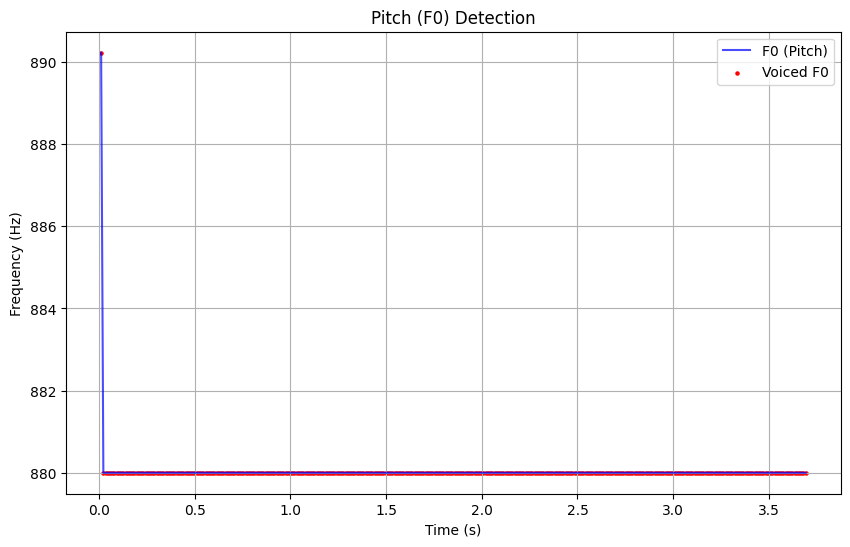

Average F0: 880.0321544259928 Hz


In [ ]:
audio_file = output_lpf_path  # Replace with your audio file path
f0, voiced_f0, sr, avg_f0 = extract_average_f0(audio_file)
if f0 is not None and voiced_f0 is not None:
    visualize_f0(f0, voiced_f0, sr)
    print(f"Average F0: {avg_f0} Hz")

**F0 TO NOTE**

In [ ]:
def frequency_to_midi(frequency):
    midi_note = 69 + 12 * np.log2(frequency / 440.0)
    return midi_note

def midi_to_note(midi_number):
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

    # Menentukan octave dan note
    note = notes[int(midi_number) % 12]
    octave = int(midi_number) // 12 - 1 # Octave dimulai dari A1

    return f'{note}{octave}'

In [ ]:
average_f0 =  avgf0

midi_note = frequency_to_midi(average_f0)

note_name = midi_to_note(midi_note)

print(f'F0: {average_f0} Hz')
print(f'MIDI Note: {midi_note:.2f}')
print(f'Note Name: {note_name}')

F0: 880.0321544259928 Hz
MIDI Note: 81.00
Note Name: A5


## Analisis

Jadi karena kami melakukan ekstraksi pitch maka diperlukan kejelasan sinyal, oleh sebab itu kami memilih analisis menggunakan SNR ini untuk mendeteksi noise. Jika noise mendominasi (SNR rendah), maka deteksi pitch menjadi tidak akurat karena noise dapat mengganggu harmoni atau menambahkan komponen spektral palsu pada frekuensi yang salah. Dalam hal ini, hasil pitch akan menjadi tidak linear dengan tujuan ekstraksi.
Untuk SNR yang cukup tinggi, pitch dapat tetap linear karena sinyal masih jelas dan noise memiliki pengaruh minimal pada komponen frekuensi utama.



*   Nilai SNR Positif: Menunjukkan bahwa sinyal lebih kuat dari noise, yang diinginkan dalam sistem komunikasi atau rekaman berkualitas tinggi.
*   Nilai SNR Rendah atau Negatif: Menandakan kontaminasi noise yang signifikan, yang memerlukan teknik pengolahan tambahan seperti noise reduction.

**SIGNAL TO NOISE RATIO**

Sampling Rate: 44100 Hz
Powersignal: 253318213024973184.00
Powernoise: 6.36e+17
SNR: -4.00 dB


<ipython-input-210-45c192211ea0>:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio_data = wavfile.read(file_path)


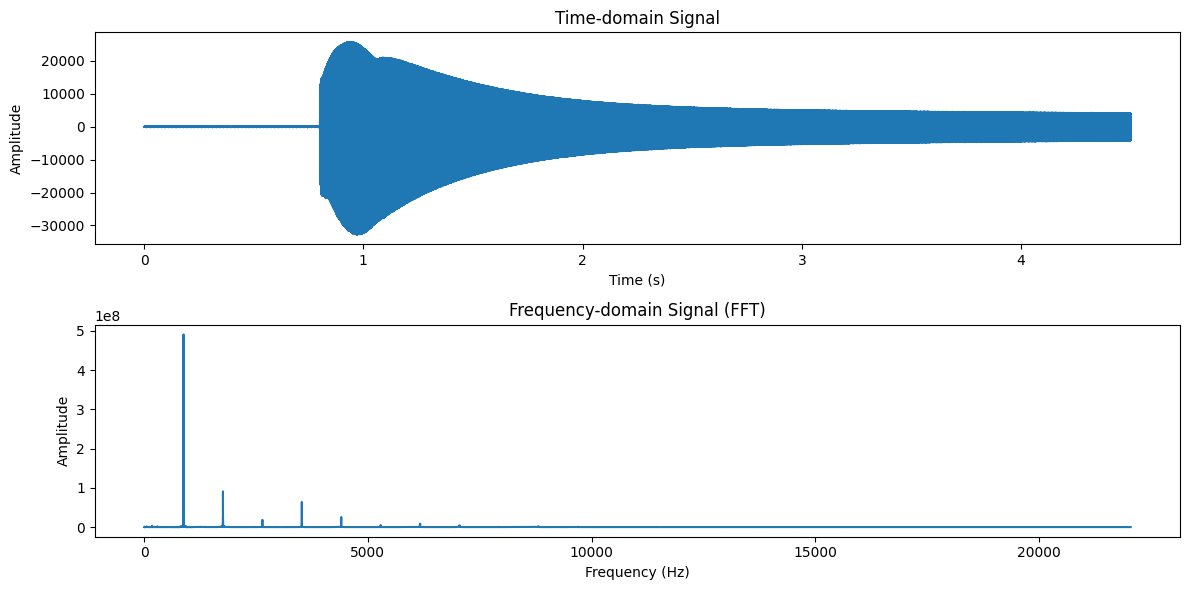

Sampling Rate: 44100 Hz
Powersignal: 195403772608777568.00
Powernoise: 1.83e+17
SNR: 0.27 dB


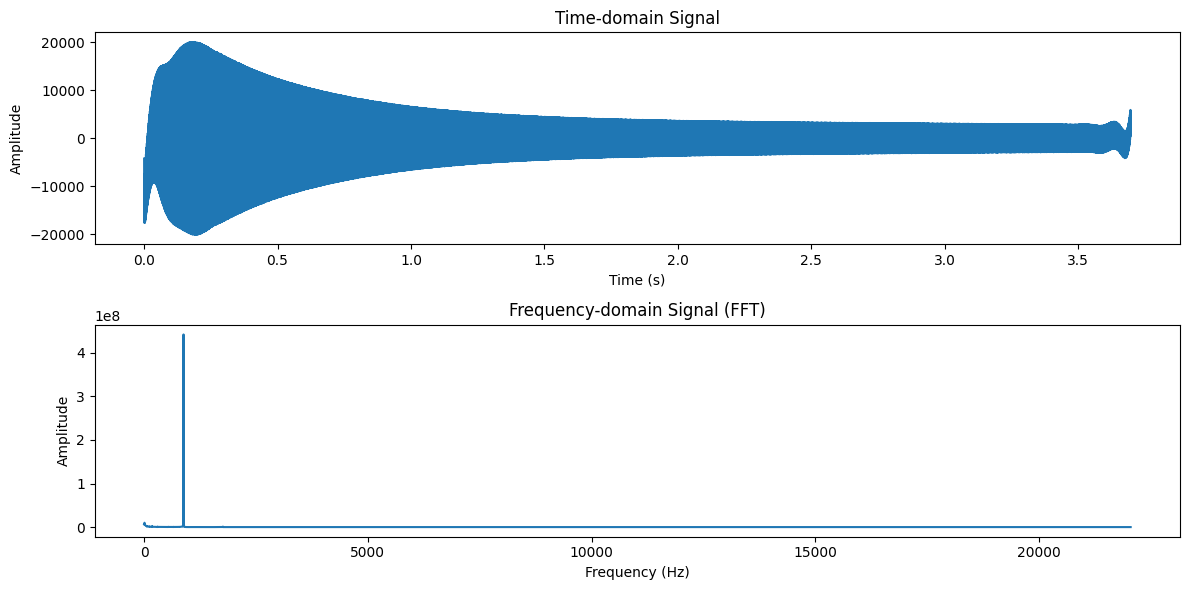

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import find_peaks
import scipy.io.wavfile as wav

# Function to read WAV file
def read_wav(file_path):
    fs, audio_data = wavfile.read(file_path)
    if len(audio_data.shape) > 1:
        audio_data = audio_data[:, 0]  # Use only one channel for stereo files
    return fs, audio_data

def calculate_snr(signal, fs):
    # FFT untuk mendapatkan spektrum frekuensi
    fft_spectrum = np.fft.rfft(signal)
    fft_frequencies = np.fft.rfftfreq(len(signal), 1 / fs)

    # Identifikasi frekuensi dominan (peaks)
    peaks, _ = find_peaks(np.abs(fft_spectrum), height=np.max(np.abs(fft_spectrum)) * 0.1)
    if len(peaks) > 0:
        dominant_freqs = fft_frequencies[peaks]
    else:
        dominant_freqs = []

    # Filter frekuensi dominan untuk menghitung power sinyal
    power_signal = np.sum(np.abs(fft_spectrum[peaks])**2) if len(dominant_freqs) > 0 else 1e-10

    # Estimasi noise power: Semua yang tidak di frekuensi dominan
    non_peak_indices = np.setdiff1d(np.arange(len(fft_spectrum)), peaks)
    power_noise = np.sum(np.abs(fft_spectrum[non_peak_indices])**2)

    # SNR dalam dB
    snr = 10 * np.log10(power_signal / power_noise)
    return power_signal, power_noise, snr, fft_frequencies, fft_spectrum


file_path = [audio_file_path, output_lpf_path]
for i in file_path:
  fs, audio_data = read_wav(i)

  # Calculate SNR
  power_signal, power_noise, snr, fft_frequencies, fft_spectrum = calculate_snr(audio_data, fs)

  # Display results
  print(f"Sampling Rate: {fs} Hz")
  print(f"Powersignal: {power_signal:.2f}")
  print(f"Powernoise: {power_noise:.2e}")
  print(f"SNR: {snr:.2f} dB")

  # Plot the original signal and its FFT
  plt.figure(figsize=(12, 6))

  # Time-domain signal
  plt.subplot(2, 1, 1)
  time = np.linspace(0, len(audio_data) / fs, len(audio_data))
  plt.plot(time, audio_data)
  plt.title('Time-domain Signal')
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')

  # Frequency-domain signal (FFT)
  plt.subplot(2, 1, 2)
  plt.plot(fft_frequencies, np.abs(fft_spectrum))
  plt.title('Frequency-domain Signal (FFT)')
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Amplitude')

  plt.tight_layout()
  plt.show()


**AMPLITUDO TERBESAR DALAM MEL SPECTOGRAM**

Brightest part frequency: 861.328125 Hz at time 0.19 s


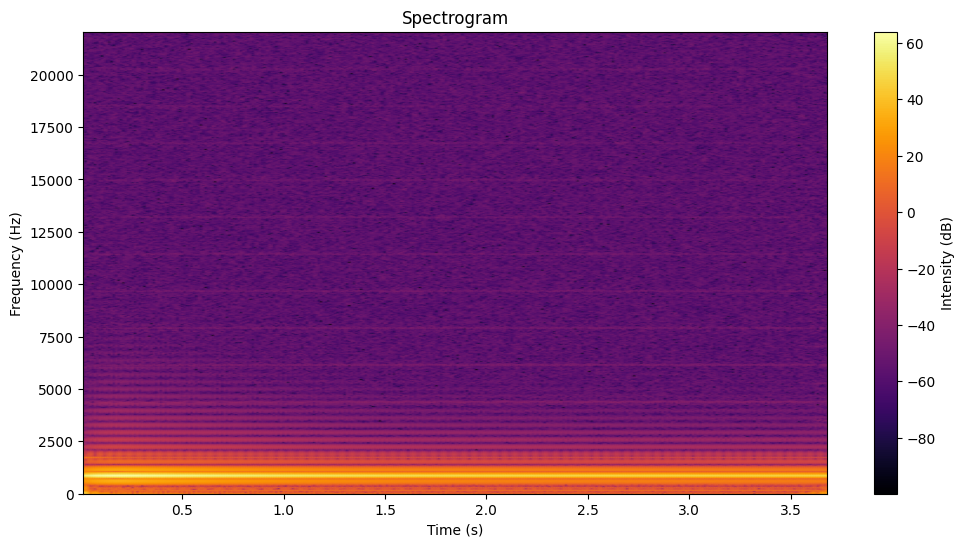

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from scipy.io import wavfile

def get_brightest_frequency(file_path):
    # Load the WAV file
    fs, audio_data = wavfile.read(file_path)
    if len(audio_data.shape) > 1:
        audio_data = audio_data[:, 0]  # Use one channel if stereo

    # Compute the spectrogram
    f, t, Sxx = spectrogram(audio_data, fs, nperseg=1024, noverlap=512)

    # Convert power to dB scale
    Sxx_dB = 10 * np.log10(Sxx + 1e-10)

    # Find the frequency with the maximum intensity
    max_idx = np.unravel_index(np.argmax(Sxx_dB, axis=None), Sxx_dB.shape)
    max_frequency = f[max_idx[0]]
    max_time = t[max_idx[1]]

    print(f"Brightest part frequency: {max_frequency} Hz at time {max_time:.2f} s")

    # Plot the spectrogram
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(t, f, Sxx_dB, shading='gouraud', cmap='inferno')
    plt.colorbar(label='Intensity (dB)')
    plt.title("Spectrogram")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

    return max_frequency, max_time

# Replace 'file_path' with your audio file path
file_path = output_lpf_path
brightest_freq, brightest_time = get_brightest_frequency(file_path)

**DETECT DOMINANT FREQ**

Dominant Frequency: 881.25 Hz


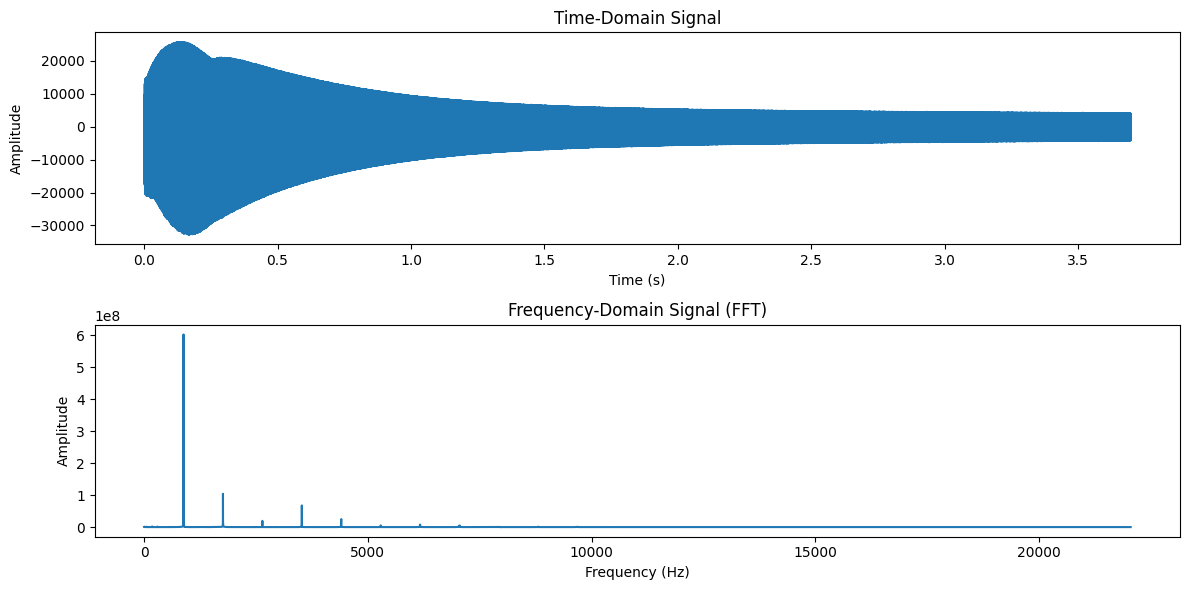

The fundamental frequency of the audio is: 881.2534501159238 Hz


In [ ]:
# INI DI KEEP
import numpy as np
from scipy.io import wavfile
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Function to read WAV file
def read_wav(file_path):
    fs, audio_data = wavfile.read(file_path)
    if len(audio_data.shape) > 1:
        audio_data = audio_data[:, 0]  # Use only one channel for stereo files
    return fs, audio_data

# Function to calculate FFT and find dominant frequency
def find_dominant_frequency(file_path, threshold=0.1):
    # Step 1: Read the WAV file
    fs, audio_data = read_wav(file_path)

    # Step 2: Calculate FFT
    fft_spectrum = np.fft.rfft(audio_data)
    fft_frequencies = np.fft.rfftfreq(len(audio_data), 1 / fs)

    # Step 3: Find Peaks in FFT
    # Normalize FFT spectrum to calculate a relative threshold
    normalized_fft = np.abs(fft_spectrum) / np.max(np.abs(fft_spectrum))
    peaks, _ = find_peaks(normalized_fft, height=threshold)

    if len(peaks) > 0:
        dominant_frequency = fft_frequencies[peaks[0]]  # The first peak is the fundamental frequency
        print(f"Dominant Frequency: {dominant_frequency:.2f} Hz")
    else:
        dominant_frequency = None
        print("No dominant frequency found above the threshold.")

    # Step 4: Plot the results
    plt.figure(figsize=(12, 6))

    # Time-domain plot
    time = np.linspace(0, len(audio_data) / fs, len(audio_data))
    plt.subplot(2, 1, 1)
    plt.plot(time, audio_data)
    plt.title("Time-Domain Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Frequency-domain plot
    plt.subplot(2, 1, 2)
    plt.plot(fft_frequencies, np.abs(fft_spectrum))
    plt.title("Frequency-Domain Signal (FFT)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

    return dominant_frequency

# Example usage
file_path = output_trimmed_path  # Replace with your WAV file path
dominant_freq = find_dominant_frequency(file_path, threshold=0.1)
print(f"The fundamental frequency of the audio is: {dominant_freq} Hz")


## Kesimpulan

Dari langkah-langkah yang telah kami lakukan, kami mendapatkan kesimpulan sebagai berikut:
1. Pada tahap awal, kami melakukan akuisisi data dan setelahnya melakukan visualisasi untuk memahami karakteristik temporal dan spektral sinyal.
2. Setelah itu, kami melakukan pra-pemrosesan seperti pemotongan pada bagian hening dan penerapan filter untuk mengurangi noise dan meningkatkan kualitas data.
3. Selanjutnya kami melakukan ekstraksi fitur yang berfokus pada perhitungan frekuensi fundamental (F0) yang kemudian dikonversi ke notasi MIDI untuk menentukan pitch dari sinyal suara tersebut.
4. Terakhir kami melakukan analisis untuk mengevaluasi kualitas sinyal melalui perhitungan Signal-to-Noise Ratio (SNR), untuk memberikan gambaran kuantitatif mengenai proporsi sinyal terhadap noise dalam audio.